In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt, date
from scipy import stats 

#### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [3]:
claims= pd.read_csv(r"F:\AnalyticslabFIles\Projects\python\Case Study 3 - Insurance Claims Case Study\claims.csv")
cust_demo= pd.read_csv(r"F:\AnalyticslabFIles\Projects\python\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")

In [4]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [5]:
cust_demo.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [6]:
# Joining the two datasets
cust_demo_claims= pd.merge(left= claims, right= cust_demo, how= 'inner', left_on= 'customer_id', right_on= 'CUST_ID' )

In [14]:
cust_demo_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980,3.0,No,75740424,Female,2070-01-13,ME,265-543-1264,Silver


#### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [18]:
cust_demo_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   object        
 1   customer_id          1085 non-null   object        
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   float64       
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  CUST_ID              1085 non-null   object        
 11  gender               1085 non-null   object        
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

In [9]:
# Assigning object datatype to categorical columns

for i in ['claim_id', 'customer_id', 'CUST_ID']:
    cust_demo_claims[i]= cust_demo_claims[i].astype(str)

In [11]:
# Assigning date datatype to date columns

for i in ['claim_date', 'DateOfBirth']:
    cust_demo_claims[i]= pd.to_datetime(cust_demo_claims[i])

#### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [13]:
# Removing the noise from the claim_amount column.

cust_demo_claims.claim_amount= cust_demo_claims.claim_amount.str.replace('$', '')

In [17]:
# Assigning datatype to the claim_amount column

cust_demo_claims.claim_amount= cust_demo_claims.claim_amount.astype('float64')

#### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.


In [29]:
cust_demo_claims.loc[:, 'flag']= np.where(cust_demo_claims.police_report == 'No', 0, np.where(cust_demo_claims.police_report== 'Yes', 1, np.nan))

In [30]:
cust_demo_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,2070-01-13,ME,265-543-1264,Silver,NaN


#### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 
#### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [32]:
cust_demo_claims.pivot_table(values= 'claim_date' , index= 'customer_id', aggfunc= 'max')

,claim_date
customer_id,
10149231,2018-04-24
10198314,2018-05-01
10330113,2017-12-17
10462042,2018-08-03
10665308,2018-07-20
...,...
99674324,2018-07-07
99723844,2018-01-06
99761663,2018-04-04


#### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [34]:
cust_demo_claims.isna().sum()

claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount            65
total_policy_claims     10
fraudulent               0
CUST_ID                  0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
flag                   296
dtype: int64

In [35]:
for i in ['claim_amount', 'total_policy_claims', 'flag']:
    if cust_demo_claims[i].dtype== 'object':
        cust_demo_claims.fillna(cust_demo_claims[i].mode()[0], inplace= True)
    else:
        cust_demo_claims.fillna(cust_demo_claims[i].mean(), inplace= True)

In [36]:
cust_demo_claims.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
flag                   0
dtype: int64

#### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#### Children < 18
#### Youth 18-30
#### Adult 30-60
#### Senior > 60

In [43]:
# Creating a new column 'Age'

cust_demo_claims['Age']= date.today().year - cust_demo_claims.DateOfBirth.dt.year

In [55]:
cust_demo_claims.loc[:, 'criteria'] = np.where(cust_demo_claims.Age <18, 'Children', 
                                      np.where((cust_demo_claims.Age >= 18) & (cust_demo_claims.Age<= 30), 'Youth',
                                      np.where((cust_demo_claims.Age > 30) & (cust_demo_claims.Age <= 60), 'Adult', 'Senior')))

In [153]:
cust_demo_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,gender,DateOfBirth,State,Contact,Segment,flag,Age,criteria,Month,Year
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,...,Female,1979-01-12,VT,789-916-8172,Platinum,0.000000,44,Adult,11,2017
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,...,Female,2070-01-13,ME,265-543-1264,Silver,12467.681373,-47,Children,10,2018


#### 8. What is the average amount claimed by the customers from various segments?


In [57]:
cust_demo_claims.pivot_table(values= 'claim_amount', index= 'Segment', aggfunc= 'mean')

,claim_amount
Segment,
Gold,12829.631974
Platinum,12341.952267
Silver,12208.435570


#### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [70]:
cust_demo_claims.loc[(cust_demo_claims.claim_date >= min(cust_demo_claims.claim_date)) & (cust_demo_claims.claim_date <= '2018-09-10'), :].pivot_table(values= 'claim_amount', index= 'incident_cause', aggfunc= 'sum' )

,claim_amount
incident_cause,
Crime,7.244484e+05
Driver error,3.319952e+06
Natural causes,1.314121e+06
Other causes,3.724985e+06
Other driver error,3.318770e+06


#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [76]:
cust_demo_claims.loc[(cust_demo_claims.State == 'Tx')  | (cust_demo_claims.State == 'DE') | (cust_demo_claims.State == 'AK') | (cust_demo_claims.incident_cause == 'Driver error') | (cust_demo_claims.incident_cause == 'Other driver error'), 'CUST_ID'].count()

529

#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


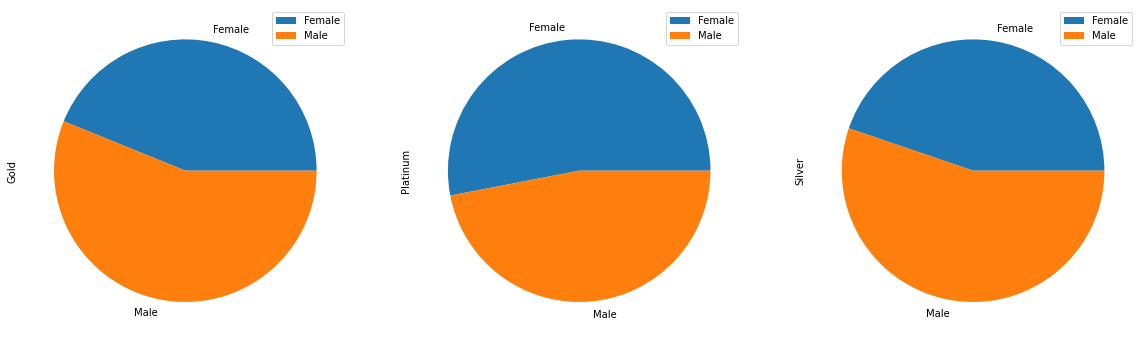

In [161]:
cust_demo_claims.pivot_table(values= 'claim_amount', index= 'gender', columns= 'Segment', aggfunc= 'sum').plot(kind= 'pie', subplots= True, figsize= (20, 10))
plt.show()

#### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


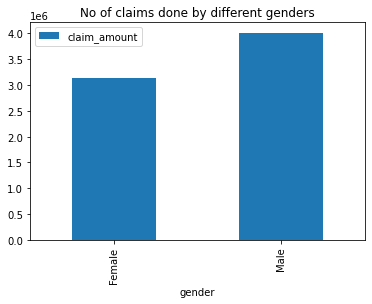

In [95]:
cust_demo_claims.loc[(cust_demo_claims.incident_cause == 'Driver error') | (cust_demo_claims.incident_cause == 'Other driver error'), :].pivot_table(values= 'claim_amount', index= 'gender', aggfunc= 'sum').plot(kind= 'bar')
plt.title('No of claims done by different genders')
plt.show()

#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [162]:
cust_demo_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,gender,DateOfBirth,State,Contact,Segment,flag,Age,criteria,Month,Year
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,...,Female,1979-01-12,VT,789-916-8172,Platinum,0.000000,44,Adult,11,2017
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,...,Female,2070-01-13,ME,265-543-1264,Silver,12467.681373,-47,Children,10,2018


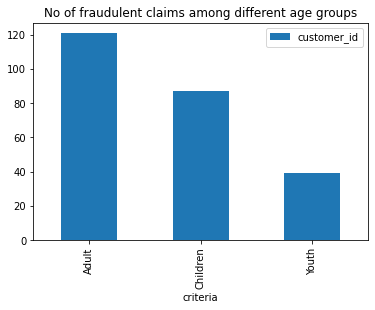

In [101]:
cust_demo_claims.loc[cust_demo_claims.fraudulent == 'Yes', :].pivot_table(values= 'customer_id', index= 'criteria', aggfunc= 'count').plot(kind= 'bar')
plt.title('No of fraudulent claims among different age groups')
plt.show()

#### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [102]:
# Creating a new column 'Month'

cust_demo_claims.loc[:, 'Month'] = cust_demo_claims.claim_date.dt.month

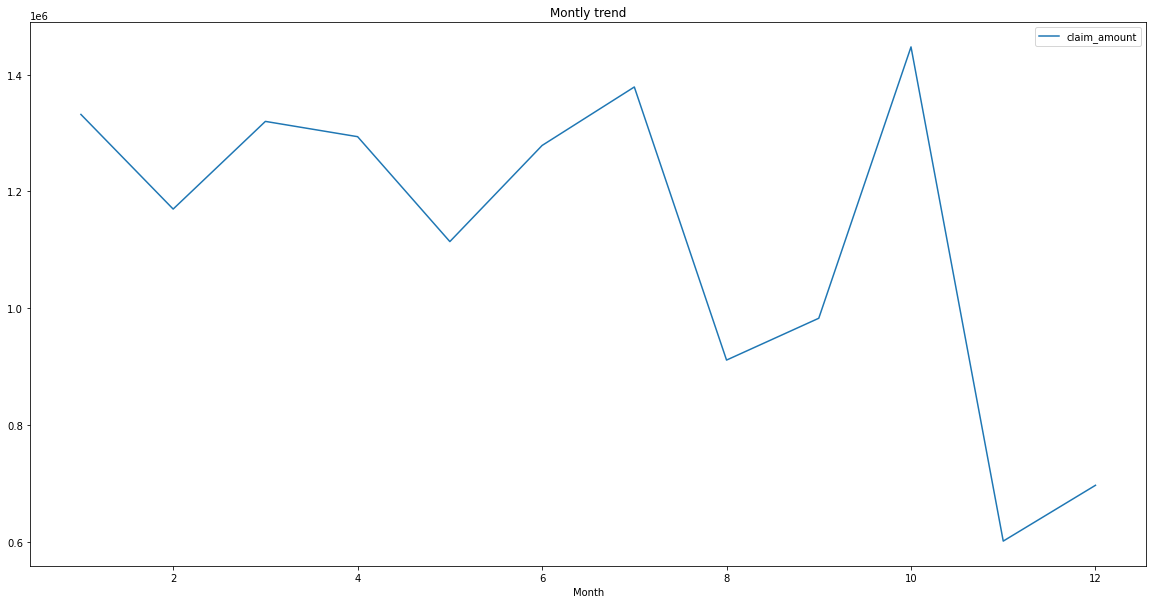

In [108]:
cust_demo_claims.pivot_table(values= 'claim_amount', index= 'Month', aggfunc= 'sum').plot(kind= 'line', figsize= (20, 10))
plt.title('Montly trend')
plt.show()

#### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

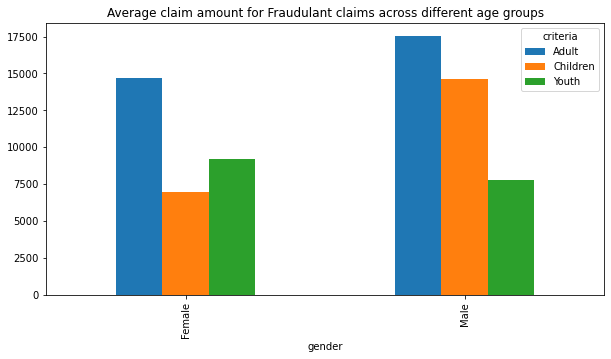

In [119]:
# For Fraudulant claims

cust_demo_claims.loc[cust_demo_claims.fraudulent == 'Yes', :].pivot_table(values= 'claim_amount', index= 'gender', columns= 'criteria', aggfunc= 'mean').plot(kind= 'bar', figsize= (10, 5))
plt.title('Average claim amount for Fraudulant claims across different age groups')
plt.show()

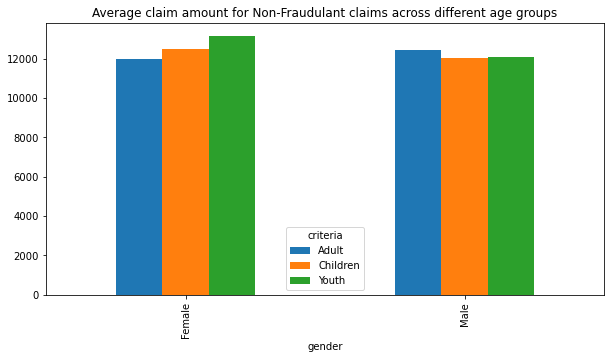

In [117]:
# For Non-Fraudulant claims

cust_demo_claims.loc[cust_demo_claims.fraudulent == 'No', :].pivot_table(values= 'claim_amount', index= 'gender', columns= 'criteria', aggfunc= 'mean').plot(kind= 'bar', figsize= (10, 5))
plt.title('Average claim amount for Non-Fraudulant claims across different age groups')
plt.show()

Based on the conclusions from exploratory analysis as well as suitable 
statistical tests, answer the below questions. Please include a detailed 
write-up on the parameters taken into consideration, the Hypothesis 
testing steps, conclusion from the p-values and the business implications of 
the statements. 

#### 16. Is there any similarity in the amount claimed by males and females?

In [131]:
# Declare the variable for which we want to the analysis
var= 'claim_amount'

# Filter the data based on gender
male_data= cust_demo_claims.loc[cust_demo_claims.gender == 'Male', var]
female_data= cust_demo_claims.loc[cust_demo_claims.gender == 'Female', var]

# Display the mean of two samples
print('mean of male_data:', male_data.mean(), '| mean of female_data:', female_data.mean())

mean of male_data: 12853.058506136278 | mean of female_data: 12062.634706623674


In [132]:
# H0: No similarity between the amount claimed by males and females
# Ha: Similarity between the amounnt claimed by males and females
# CI: 95%, p-value: 0.05

# Perform the test:
stats.ttest_ind(male_data, female_data)


Ttest_indResult(statistic=0.9738138415066818, pvalue=0.33036643165116597)

In [133]:
# Business conclusion:
print('Business conclusion: We fail to reject the null hypothesis (H0) i,e there is no similarity between amounts claimed by males and females')

Business conclusion: We fail to reject the null hypothesis (H0) i,e there is no similarity between amounts claimed by males and females


#### 17. Is there any relationship between age category and segment?


In [124]:
# Creating Observed Frequency table:

obser_fre= pd.crosstab(index= cust_demo_claims.criteria, columns= cust_demo_claims.Segment)

In [125]:
# H0: No relation between the age category and segment
# Ha: Relation between the age category and segment
# CI: 95%, p-value: 0.05

# Perform the test:
stats.chi2_contingency(observed= obser_fre)

(0.8366360274865196,
 0.9334701046136987,
 4,
 array([[180.76036866, 174.49400922, 167.74562212],
        [122.35023041, 118.10875576, 113.54101382],
        [ 71.88940092,  69.39723502,  66.71336406]]))

In [126]:
# Business conclusion:
print('Business conclusion: We fail to reject the null hypothesis ( H0 ) i,e there is no relation between Age category and Segment')

Business conclusion: We fail to reject the null hypothesis ( H0 ) i,e there is no relation between Age category and Segment


#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [145]:
# Creating a new column 'Year'

cust_demo_claims.loc[:, 'Year']= cust_demo_claims.claim_date.dt.year

In [150]:
# Sample to be considered
var_name= 'claim_amount'

# mean value to be compared
pop_mean= 10000
sample= cust_demo_claims.loc[cust_demo_claims.Year== 2017, 'claim_amount' ]
mean_sample= sample.mean()

# Display the means
print('Population mean:', pop_mean, '| Sample mean:', mean_sample)

Population mean: 10000 | Sample mean: 12277.55037215556


In [151]:
# H0: u<= 10000
# Ha: u> 10000
# CI: 95%, p-value: 0.05

# Perform the test:
stats.ttest_1samp(a= sample, popmean= pop_mean)

Ttest_1sampResult(statistic=4.195278754700451, pvalue=3.1395187382733834e-05)

In [152]:
# Business conclusion:
print('Business conclusion: The claim amount has significantly increased from last year hypothised value $10000')

Business conclusion: The claim amount has significantly increased from last year hypothised value $10000


#### 19. Is there any difference between age groups and insurance claims?

In [138]:
# Declare the variable for which we want to the analysis
var= 'claim_amount'

# filter the data based on age group
children_data= cust_demo_claims.loc[cust_demo_claims.criteria == 'Children', var]
youth_data= cust_demo_claims.loc[cust_demo_claims.criteria == 'Youth', var]
adult_data= cust_demo_claims.loc[cust_demo_claims.criteria == 'Adult', var]

# Display the mean of three samples
print('mean of children_data:', children_data.mean(), '| mean of youth_data:', youth_data.mean(), '| mean of adult_data:', adult_data.mean())

mean of children_data: 11873.01628447989 | mean of youth_data: 11848.547605580688 | mean of adult_data: 13116.421840437903


In [139]:
# H0: All the samples are from the same population i,e Means are EQUAL.
# Ha: All the samples are from different population i,e Means are UNEQUAL.
# CI: 95%, p-value: 0.05

# Perform the test:
stats.f_oneway(children_data, youth_data, adult_data)

F_onewayResult(statistic=1.1903965028354122, pvalue=0.30449860641723653)

In [140]:
# Business conclusion:
print('Business conclusion: We fail to reject the null hypothesis (H0) i,e there is relation between amounts claimed by different age group which mean people from different age groups are claiming amount similarly.')

Business conclusion: We fail to reject the null hypothesis (H0) i,e there is relation between amounts claimed by different age group which mean people from different age groups are claiming amount similarly.


#### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [141]:
cust_demo_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,Age,criteria,Month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0.000000,44,Adult,11
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,2070-01-13,ME,265-543-1264,Silver,12467.681373,-47,Children,10


In [142]:
# Declare the variable for which we want to the analysis
var= 'claim_amount'

# filter the data based on age group
s1= cust_demo_claims.loc[cust_demo_claims.total_policy_claims == 1.0, var]
s2= cust_demo_claims.loc[cust_demo_claims.total_policy_claims == 2.0, var]
s3= cust_demo_claims.loc[cust_demo_claims.total_policy_claims == 3.0, var]
s4= cust_demo_claims.loc[cust_demo_claims.total_policy_claims == 4.0, var]
s5= cust_demo_claims.loc[cust_demo_claims.total_policy_claims == 5.0, var]
s6= cust_demo_claims.loc[cust_demo_claims.total_policy_claims == 6.0, var]
s7= cust_demo_claims.loc[cust_demo_claims.total_policy_claims == 7.0, var]
s8= cust_demo_claims.loc[cust_demo_claims.total_policy_claims == 8.0, var]

# Display the mean of three samples
print('mean of s1:', s1.mean(), '| mean of s2:', s2.mean(), '| mean of s3:', s3.mean(), '| mean of s4:', s4.mean(), '| mean of s5:', s5.mean(), '| mean of s6:', s6.mean(), '| mean of s7:', s7.mean(), '| mean of s8:', s8.mean())

mean of s1: 12424.092850006255 | mean of s2: 13765.521195144725 | mean of s3: 12927.995212038302 | mean of s4: 11106.92140245929 | mean of s5: 8530.254175744372 | mean of s6: 14286.768137254903 | mean of s7: 23033.0 | mean of s8: 3277.5


In [143]:
# H0: All the samples are from the same population i,e Means are EQUAL.
# Ha: All the samples are from different population i,e Means are UNEQUAL.
# CI: 95%, p-value: 0.05

# Perform the test:
stats.f_oneway(s1, s2, s3, s4, s5, s6, s7, s8)

F_onewayResult(statistic=0.8524279319141894, pvalue=0.5439242016439254)

In [144]:
# Business conclusion:
print('Business conclusion: We fail to reject the null hypothesis (H0) i,e there is relation between total number of policy claims and the claimed amount.')

Business conclusion: We fail to reject the null hypothesis (H0) i,e there is relation between total number of policy claims and the claimed amount.
